# imports 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
import os
os.environ['KAGGLE_CONFIG_DIR'] = "."

# 데이터 download 

`-` 캐글에서 자료를 다운로드 

In [2]:
!chmod 600 ./kaggle.json
!kaggle competitions download -c bike-sharing-demand
!unzip bike-sharing-demand.zip -d ./data
!rm bike-sharing-demand.zip

100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 430kB/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 429kB/s]
Archive:  bike-sharing-demand.zip
  inflating: ./data/sampleSubmission.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


`-` 잘 있나 확인 

In [3]:
!ls ./data

sampleSubmission.csv  test.csv	train.csv


In [7]:
!head ./data/train.csv

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8


In [8]:
!tail ./data/train.csv

2012-12-19 14:00:00,4,0,1,1,17.22,21.21,50,12.998,33,185,218
2012-12-19 15:00:00,4,0,1,1,17.22,21.21,50,19.0012,28,209,237
2012-12-19 16:00:00,4,0,1,1,17.22,21.21,50,23.9994,37,297,334
2012-12-19 17:00:00,4,0,1,1,16.4,20.455,50,26.0027,26,536,562
2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.91,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


# autogluon을 이용한 첫 분석

`-` autogluon 을 이용하여 data load 

In [29]:
train_data = TabularDataset('./data/train.csv').drop(['casual','registered'],axis=1)
test_data = TabularDataset('./data/test.csv')

Loaded data from: ./data/train.csv | Columns = 12 / 12 | Rows = 10886 -> 10886
Loaded data from: ./data/test.csv | Columns = 9 / 9 | Rows = 6493 -> 6493


In [30]:
train_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [31]:
test_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [32]:
predictor = TabularPredictor(label='count',problem_type='regression')
predictor.fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20230904_133352/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230904_133352/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   311.66 GB / 490.57 GB (63.5%)
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    122066.47 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 u

[1000]	valid_set's rmse: 136.065


	-134.0804	 = Validation score   (-root_mean_squared_error)
	0.41s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-122.0128	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-134.2362	 = Validation score   (-root_mean_squared_error)
	2.7s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-128.4294	 = Validation score   (-root_mean_squared_error)
	0.44s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-136.518	 = Validation score   (-root_mean_squared_error)
	5.25s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-135.0751	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-139.9605	 = Validation score   (-root_mean_squared_error)
	13.23s	 = Training   runtime
	0.01s	 = Vali

In [33]:
predictions = predictor.predict(train_data)

In [34]:
predictor.leaderboard(train_data)

                  model  score_test   score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist  -29.277866  -92.518908        0.018920       0.002748   0.010689                 0.018920                0.002748           0.010689            1       True          2
1   WeightedEnsemble_L2  -29.277866  -92.518908        0.019943       0.003013   0.222456                 0.001024                0.000265           0.211767            2       True         12
2       RandomForestMSE  -56.773851 -122.012844        0.205197       0.034002   0.831343                 0.205197                0.034002           0.831343            1       True          5
3         ExtraTreesMSE  -59.892225 -128.429416        0.103312       0.034829   0.435451                 0.103312                0.034829           0.435451            1       True          7
4        KNeighborsUnif  -81.605878

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-29.277866,-92.518908,0.018920,0.002748,0.010689,0.018920,0.002748,0.010689,1,True,2
1,WeightedEnsemble_L2,-29.277866,-92.518908,0.019943,0.003013,0.222456,0.001024,0.000265,0.211767,2,True,12
2,RandomForestMSE,-56.773851,-122.012844,0.205197,0.034002,0.831343,0.205197,0.034002,0.831343,1,True,5
3,ExtraTreesMSE,-59.892225,-128.429416,0.103312,0.034829,0.435451,0.103312,0.034829,0.435451,1,True,7
4,KNeighborsUnif,-81.605878,-109.984461,0.018461,0.002700,0.010497,0.018461,0.002700,0.010497,1,True,1
5,XGBoost,-87.981046,-135.075087,0.047721,0.005103,0.422865,0.047721,0.005103,0.422865,1,True,9
6,LightGBMLarge,-95.485492,-132.173561,0.033100,0.003929,0.681926,0.033100,0.003929,0.681926,1,True,11
7,LightGBM,-105.679214,-134.080427,0.045547,0.004989,0.412630,0.045547,0.004989,0.412630,1,True,4
8,CatBoost,-109.803887,-134.236163,0.005125,0.001562,2.696200,0.005125,0.001562,2.696200,1,True,6
9,LightGBMXT,-118.022777,-135.958034,0.086194,0.008725,0.655559,0.086194,0.008725,0.655559,1,True,3


In [35]:
np.sqrt(np.mean((train_data['count'] - predictions)**2))

29.277866163077135

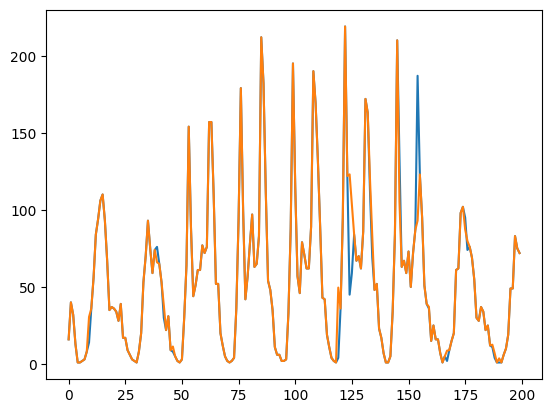

In [36]:
plt.plot(train_data['count'][:200])
plt.plot(predictions[:200])

`-` 테스트도 잘 맞출까? 

In [37]:
predictor.predict(test_data) 

0        51.861626
1        56.686295
2        59.077763
3        60.468826
4        61.419930
           ...    
6488    287.868591
6489    287.871124
6490    287.873596
6491    287.876099
6492    287.878662
Name: count, Length: 6493, dtype: float32

- 잘 맞춘지 어떻게 알지?

In [46]:
!rm submit1.csv
test_data.assign(count= predictor.predict(test_data)).loc[:,['datetime','count']].to_csv('submit1.csv',index=False)

In [40]:
predictor.predict(test_data)

0        51.861626
1        56.686295
2        59.077763
3        60.468826
4        61.419930
           ...    
6488    287.868591
6489    287.871124
6490    287.873596
6491    287.876099
6492    287.878662
Name: count, Length: 6493, dtype: float32

# autogluon을 이용한 첫 분석

`-` autogluon 을 이용하여 data load 

In [29]:
train_data = TabularDataset('./data/train.csv').drop(['casual','registered'],axis=1)
test_data = TabularDataset('./data/test.csv')

Loaded data from: ./data/train.csv | Columns = 12 / 12 | Rows = 10886 -> 10886
Loaded data from: ./data/test.csv | Columns = 9 / 9 | Rows = 6493 -> 6493


In [51]:
train_data['count'].max()

977

In [54]:
np.random.randint(1,977,size=6493)

array([560, 630, 193, ..., 487, 526, 791])

In [60]:
test_data.assign(count=np.random.randint(1,977,size=6493))\
.loc[:,['datetime','count']]\
.to_csv('submit0.csv',index=False)

In [39]:
!cat ./data/sampleSubmission.csv

datetime,count
2011-01-20 00:00:00,0
2011-01-20 01:00:00,0
2011-01-20 02:00:00,0
2011-01-20 03:00:00,0
2011-01-20 04:00:00,0
2011-01-20 05:00:00,0
2011-01-20 06:00:00,0
2011-01-20 07:00:00,0
2011-01-20 08:00:00,0
2011-01-20 09:00:00,0
2011-01-20 10:00:00,0
2011-01-20 11:00:00,0
2011-01-20 12:00:00,0
2011-01-20 13:00:00,0
2011-01-20 14:00:00,0
2011-01-20 15:00:00,0
2011-01-20 16:00:00,0
2011-01-20 17:00:00,0
2011-01-20 18:00:00,0
2011-01-20 19:00:00,0
2011-01-20 20:00:00,0
2011-01-20 21:00:00,0
2011-01-20 22:00:00,0
2011-01-20 23:00:00,0
2011-01-21 00:00:00,0
2011-01-21 01:00:00,0
2011-01-21 02:00:00,0
2011-01-21 03:00:00,0
2011-01-21 04:00:00,0
2011-01-21 05:00:00,0
2011-01-21 06:00:00,0
2011-01-21 07:00:00,0
2011-01-21 08:00:00,0
2011-01-21 09:00:00,0
2011-01-21 10:00:00,0
2011-01-21 11:00:00,0
2011-01-21 12:00:00,0
2011-01-21 13:00:00,0
2011-01-21 14:00:00,0
2011-01-21 15:00:00,0
2011-01-21 16:00:00,0
2011-01-21 17:00:00,0
2011-01-21 18:00:00,0
2011-01-21 19:00:00,0
2011-01-21 20:00: